In [3]:
import pandas
data=pandas.read_csv('movie.csv')
data

text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]

In [4]:
#2. Check if data is clean/clean
data.isnull().sum()


text     0
label    0
dtype: int64

In [5]:
# # Rename the column lable
# data.rename(columns={'label': 'ratings'}, inplace=True)

# # Display the first few rows of the dataframe to confirm the change
# data.head()


In [6]:


#3. Convert the sentiments from the numerical numbers to their actual label.
#we are replacing numerical codes with their corresponding categorical labels for several columns
data['label'].replace({0:'negative',
1:'somewhat negative',
2:'neutral',
3:'somewhat positive',
4:'positive'
},
                         inplace = True)



C:\Users\Sarah\AppData\Local\Temp\ipykernel_5804\691471435.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['label'].replace({0:'negative',


In [7]:
# 4. Find the count of positive, negative and neutral sentiments etc
data.groupby('label').count()


label
negative             20019
somewhat negative    19981
dtype: int64

C:\Users\Sarah\AppData\Local\Temp\ipykernel_5804\2259504034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['label'],palette='magma')


<Axes: xlabel='count', ylabel='label'>

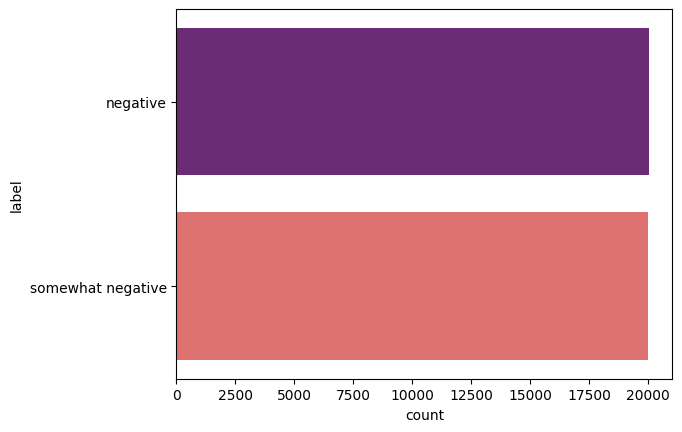

In [12]:
#5. Plot a countplot to show the count of sentiments
#countplot labels
import seaborn as sns
sns.countplot(data['label'],palette='magma')


<Axes: >

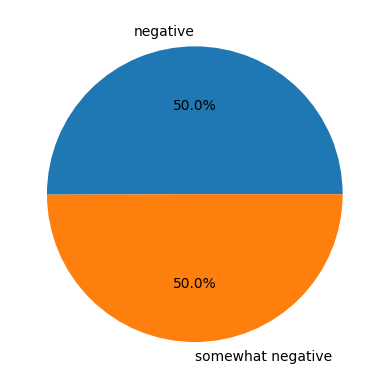

In [10]:
#6 Plot a piechart to show the distribution of the sentiments on the movies
import matplotlib.pyplot as plt

data.groupby('label').size().plot(kind='pie', autopct = '%1.1f%%')

In [10]:
# split to 30% for testing 70% for training
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data['text'], data['label'],
                                                                    test_size = 0.3,
                                                                    random_state=42)


In [11]:
#7 Perform Sentiment Analysis. Which algorithm will you use? How accurate is it?
#transfeoms words to ) and 1
 #data is in matrix
 #stopwords has been removed
 #x isikue words
 # remove stop words  from X_train or X_test
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = True, stop_words = 'english')#This line imports the CountVectorizer from sklearn.feature_extraction.text, creates a vectorizer that converts text to lowercase and removes English stop words, and then fits and transforms the training text data into a numerical format (sparse matrix).

X_train_new = vectorizer.fit_transform(X_train)
X_train_new

<28000x79922 sparse matrix of type '<class 'numpy.int64'>'
	with 2476083 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

model = LogisticRegression()
model.fit(X_train_new, Y_train)

c:\Users\Shanice\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# test the model, first vectorize
X_test_new = vectorizer.transform(X_test)#These lines transform the testing text data (X_test) using the previously fitted vectorizer, make predictions using the trained model, and then print the count of each sentiment class in the original data.
predictions = model.predict(X_test_new)
print(data.groupby('label').size())

label
negative             20019
somewhat negative    19981
dtype: int64


In [14]:
#Test accuracy
from sklearn.metrics import accuracy_score
print('Accuracy ', accuracy_score(Y_test, predictions))

Accuracy  0.8749166666666667


In [15]:
negatives = data[data['label'] == 'negative']
negatives

positives = data[data['label'] == 'positive']
positives

neutral =data[data['label'] == 'neutral']
neutral


Empty DataFrame
Columns: [text, label]
Index: []

In [16]:
#8 Create a csv for each Sentiment. How many positive and somewhat positive sentiments are there?
negatives.to_csv("negatives.csv")
positives.to_csv("positives.csv")
neutral.to_csv("neutral.csv")

In [17]:
# # Word Cloud for Positive and Negative Reviews

# from wordcloud import WordCloud,STOPWORDS
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))

# positive_reviews = data[data['label'] == 'negative']['text']
# negative_reviews = data[data['label'] == 'positive']['text']

# positive_wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(positive_reviews))
# negative_wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(' '.join(negative_reviews))

AttributeError: module 'nltk' has no attribute 'data'